In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

#numbers to float
np.set_printoptions(formatter={'format_kind':'{:f}'.format})

sns.set(rc={'figure.figsize':(8,6)})

from pandas import to_datetime
import itertools
import warnings
import datetime
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score

In [2]:
raw_data = pd.read_csv('C:/Users/USER/Desktop/delhi_data.csv', encoding = 'utf-8')

In [3]:
print(raw_data.shape)
raw_data.head()

(478, 19)


,rest_name,num_indian,num_items,price_for_two,juice,pizza,japanese,ice_cream,american,Thai,italian,chinese,fast_food,desserts_,snacks_,beverages_,bakery_,rating,rated
0,24 Corner,1,4,350,0,0,0,0,0,0,1,1,0,1,1,0,NO,3.7,1
1,27 CHINA STREET,0,2,150,0,0,0,0,0,0,0,1,0,0,1,0,NO,3.8,1
2,28 Capri Italy,0,3,250,0,0,0,0,0,0,1,0,0,1,0,0,NO,4.1,2
3,34 Chowringhee Lane (Patel Nagar),1,2,250,0,0,0,0,0,0,0,0,1,0,1,0,NO,3.8,1
4,Akash Deep,1,3,300,0,0,0,0,0,0,0,0,0,0,0,0,NO,4.1,2


In [4]:
for column in raw_data:
    unique_vals = np.unique(raw_data[column])
    nr_values = len(unique_vals)
    if nr_values < 36:
        print('The number of values for feature {}: {} -- {}'.format(column, nr_values, unique_vals))
    else:
        print('The number of values for feature {}: {}'.format(column, nr_values))

The number of values for feature rest_name: 478
The number of values for feature num_indian: 8 -- [0 1 2 3 4 5 6 7]
The number of values for feature num_items: 10 -- [ 1  2  3  4  5  6  7  8  9 10]
The number of values for feature price_for_two: 34 -- [  80  100  120  130  149  150  160  178  180  199  200  225  229  250
  298  299  300  350  400  450  500  550  600  650  700  750  800  850
  900 1000 1050 1200 1400 1500]
The number of values for feature juice: 2 -- [0 1]
The number of values for feature pizza: 2 -- [0 1]
The number of values for feature japanese: 2 -- [0 1]
The number of values for feature ice_cream: 2 -- [0 1]
The number of values for feature american: 2 -- [0 1]
The number of values for feature Thai: 2 -- [0 1]
The number of values for feature italian: 2 -- [0 1]
The number of values for feature chinese: 2 -- [0 1]
The number of values for feature fast_food: 2 -- [0 1]
The number of values for feature desserts_: 2 -- [0 1]
The number of values for feature snacks_: 2

In [5]:
raw_data.isnull().sum()

rest_name        0
num_indian       0
num_items        0
price_for_two    0
juice            0
pizza            0
japanese         0
ice_cream        0
american         0
Thai             0
italian          0
chinese          0
fast_food        0
desserts_        0
snacks_          0
beverages_       0
bakery_          0
rating           0
rated            0
dtype: int64

In [6]:
raw_data.columns

Index(['rest_name', 'num_indian', 'num_items', 'price_for_two', 'juice',
       'pizza', 'japanese', 'ice_cream', 'american', 'Thai', 'italian',
       'chinese', 'fast_food', 'desserts_', 'snacks_', 'beverages_', 'bakery_',
       'rating', 'rated'],
      dtype='object')

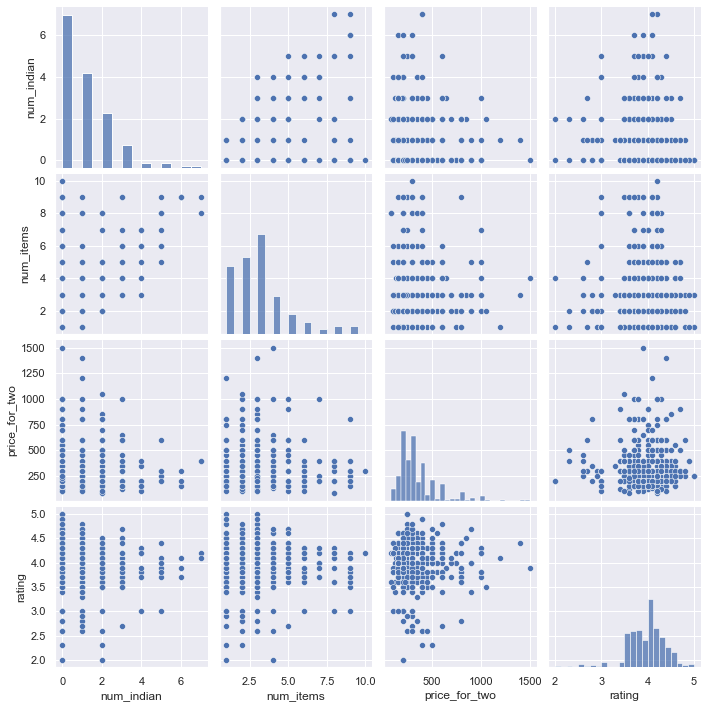

In [7]:
raw_data2 =  raw_data[['num_indian', 'num_items', 'price_for_two','rating','bakery_']]
g = sns.pairplot(raw_data2)

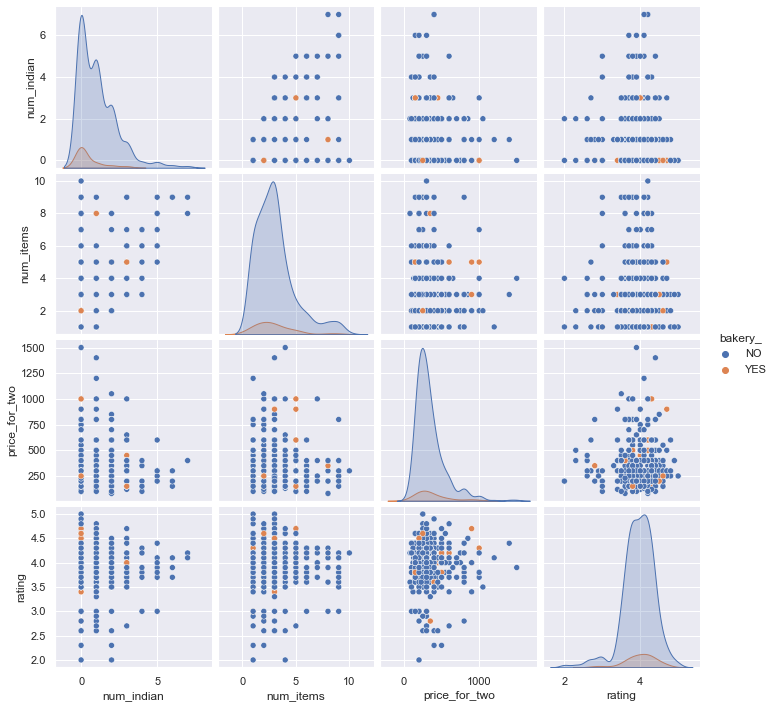

In [8]:
raw_data2 =  raw_data[['num_indian', 'num_items', 'price_for_two','rating','bakery_']]
g = sns.pairplot(raw_data2, hue ="bakery_")

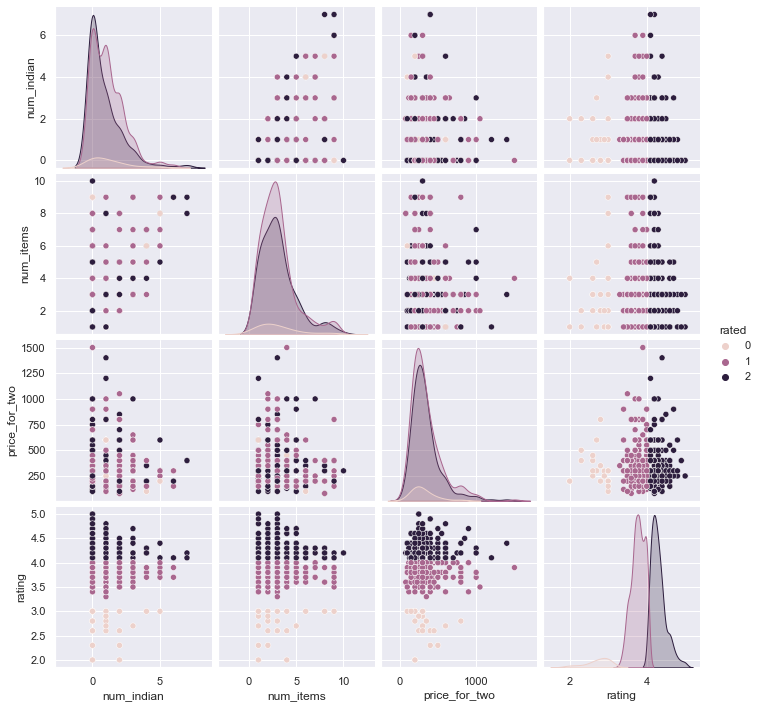

In [9]:
raw_data2 =  raw_data[['num_indian', 'num_items', 'price_for_two','rating','bakery_','rated']]
g = sns.pairplot(raw_data2, hue ="rated")

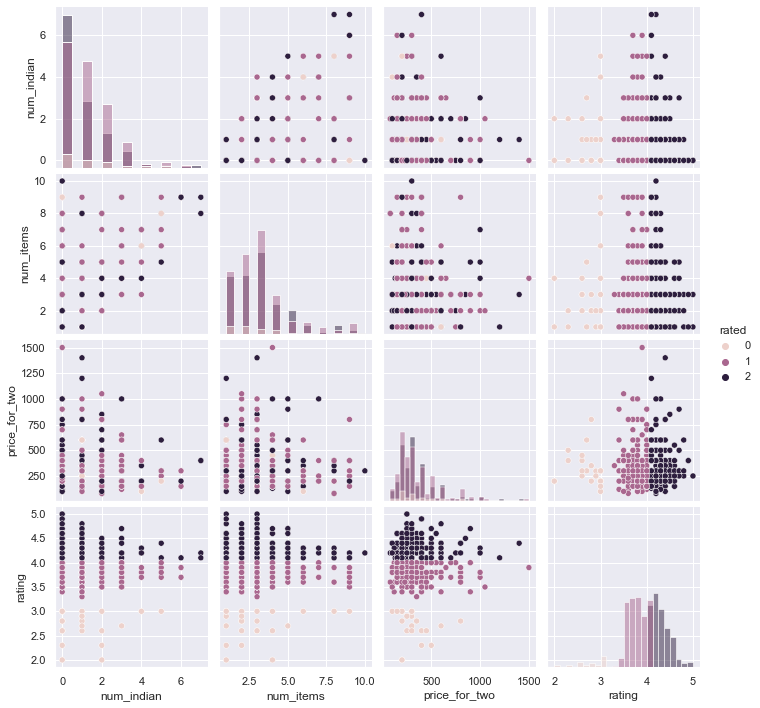

In [10]:
g = sns.pairplot(raw_data2, hue ="rated", diag_kind="hist")

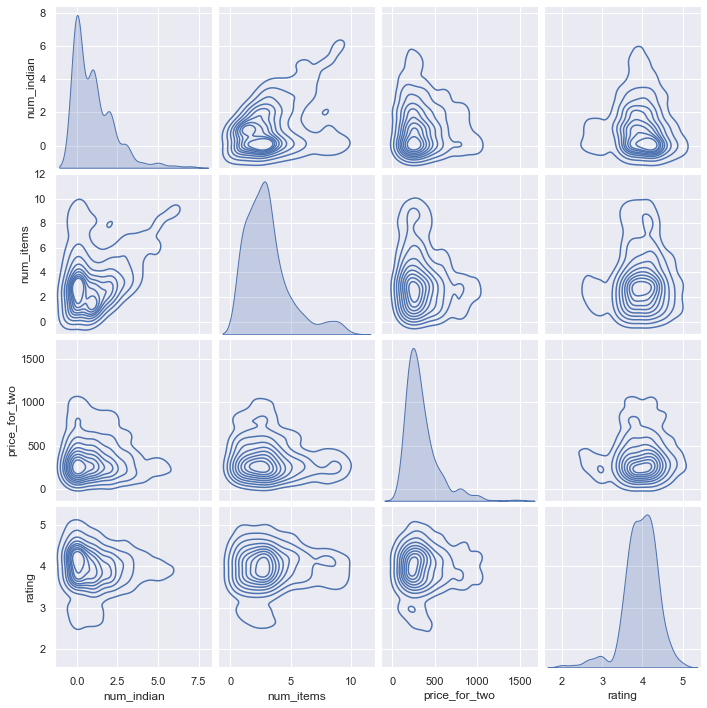

In [11]:
raw_data2 =  raw_data[['num_indian', 'num_items', 'price_for_two','rating','bakery_']]
g = sns.pairplot(raw_data2, kind="kde")

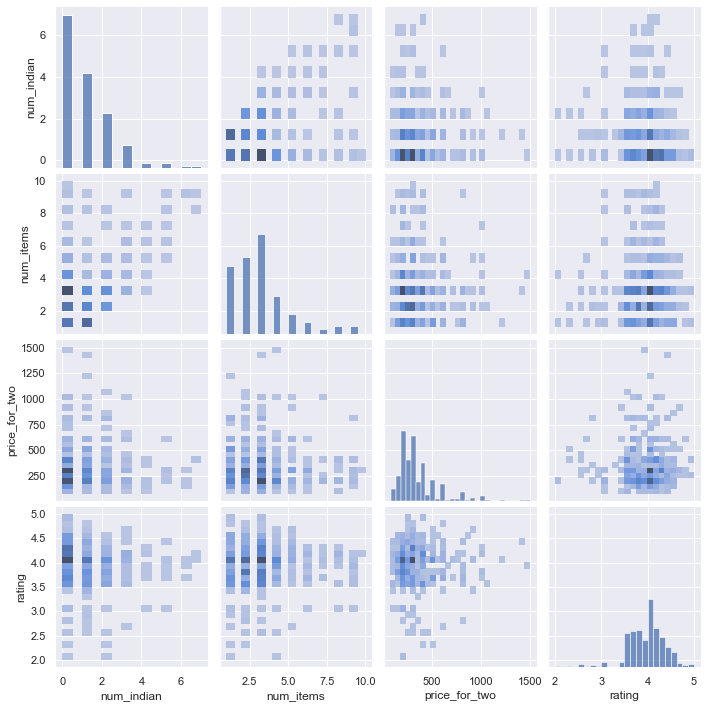

In [12]:
g = sns.pairplot(raw_data2, kind="hist")

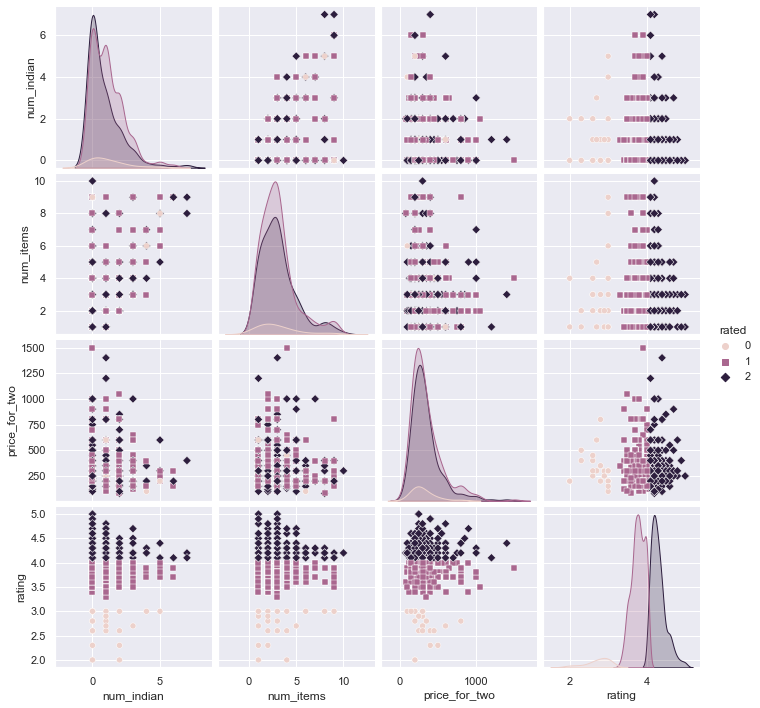

In [13]:
raw_data2 =  raw_data[['num_indian', 'num_items', 'price_for_two','rating','bakery_','rated']]
g = sns.pairplot(raw_data2, hue ="rated", markers =["o","s","D"])

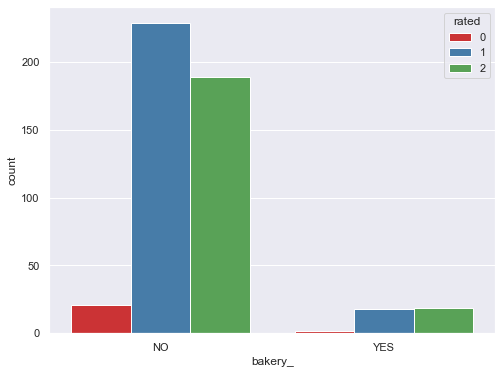

In [14]:
features = ['bakery_']
for f in features:
    plt.figure()
    ax = sns.countplot(x=f, data=raw_data2, hue = 'rated', palette="Set1")

In [15]:
# Further splitting the categorical variables to avoid numerical confusion and  for faster processing

raw_data3 = raw_data[['num_indian', 'num_items', 'price_for_two', 'juice','pizza', 'japanese', 'ice_cream', 'american', 'Thai', 'italian','chinese', 'fast_food', 'desserts_', 'snacks_', 'beverages_', 'bakery_','rating', 'rated']]
new_raw_data = pd.get_dummies(raw_data3, columns = ['juice','pizza', 'japanese', 'ice_cream', 'american', 'Thai', 'italian','chinese', 'fast_food', 'desserts_', 'snacks_', 'beverages_'])
new_raw_data.head()

,num_indian,num_items,price_for_two,bakery_,rating,rated,juice_0,juice_1,pizza_0,pizza_1,...,chinese_0,chinese_1,fast_food_0,fast_food_1,desserts__0,desserts__1,snacks__0,snacks__1,beverages__0,beverages__1
0,1,4,350,NO,3.7,1,1,0,1,0,...,0,1,1,0,0,1,0,1,1,0
1,0,2,150,NO,3.8,1,1,0,1,0,...,0,1,1,0,1,0,0,1,1,0
2,0,3,250,NO,4.1,2,1,0,1,0,...,1,0,1,0,0,1,1,0,1,0
3,1,2,250,NO,3.8,1,1,0,1,0,...,1,0,0,1,1,0,0,1,1,0
4,1,3,300,NO,4.1,2,1,0,1,0,...,1,0,1,0,1,0,1,0,1,0


In [16]:
#Scaling the columns
scale_vars = ['price_for_two', 'rating','num_indian','num_items']
scaler = MinMaxScaler()
new_raw_data[scale_vars] = scaler.fit_transform(new_raw_data[scale_vars])
new_raw_data.head()

,num_indian,num_items,price_for_two,bakery_,rating,rated,juice_0,juice_1,pizza_0,pizza_1,...,chinese_0,chinese_1,fast_food_0,fast_food_1,desserts__0,desserts__1,snacks__0,snacks__1,beverages__0,beverages__1
0,0.142857,0.333333,0.190141,NO,0.566667,1,1,0,1,0,...,0,1,1,0,0,1,0,1,1,0
1,0.000000,0.111111,0.049296,NO,0.600000,1,1,0,1,0,...,0,1,1,0,1,0,0,1,1,0
2,0.000000,0.222222,0.119718,NO,0.700000,2,1,0,1,0,...,1,0,1,0,0,1,1,0,1,0
3,0.142857,0.111111,0.119718,NO,0.600000,1,1,0,1,0,...,1,0,0,1,1,0,0,1,1,0
4,0.142857,0.222222,0.154930,NO,0.700000,2,1,0,1,0,...,1,0,1,0,1,0,1,0,1,0


In [17]:
X = new_raw_data.drop(['rating','rated', 'bakery_'],axis=1).values
y = new_raw_data['rated'].values
print('X shape: {}'.format(np.shape(X)))
print('y shape: {}'.format(np.shape(y)))

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.9, test_size = 0.1, random_state=0)

X shape: (478, 27)
y shape: (478,)


In [18]:
# max_depth is what determines the maximum depth of the three. Default is 
# none which often results in overfitting.

dt =  DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1)

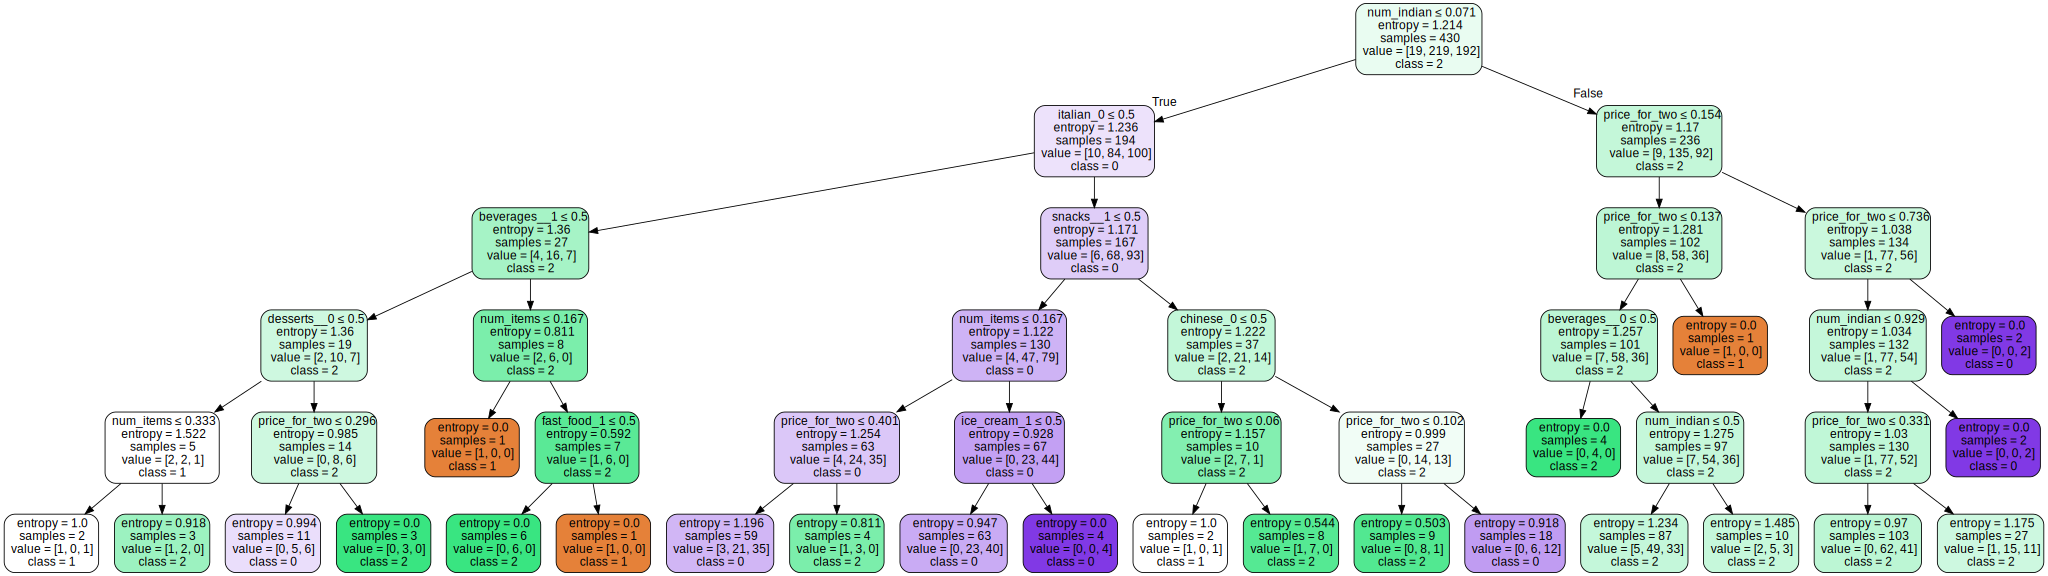

In [19]:
import graphviz
dot_data = tree.export_graphviz(dt, out_file=None,
                                feature_names=new_raw_data.drop(['rating','rated', 'bakery_'], axis=1).columns,
                                class_names=new_raw_data['rated'].unique().astype(str),
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [20]:
for i, column  in enumerate(new_raw_data.drop(['rating','rated', 'bakery_'], axis=1)):
    print('Importance of feature {}:,{:.3f}'.format(column, dt.feature_importances_[i]))
    
    fi = pd.DataFrame({'Variable':[column], 'Feature Importance Score':[dt.feature_importances_[i]]})
    
    try:
        final_fi = pd.concat([final_fi,fi], ignore_index = False)
    except:
        final_fi = fi
        
final_fi = final_fi.sort_values('Feature Importance Score', ascending = False).reset_index()
final_fi

Importance of feature num_indian:,0.109
Importance of feature num_items:,0.108
Importance of feature price_for_two:,0.374
Importance of feature juice_0:,0.000
Importance of feature juice_1:,0.000
Importance of feature pizza_0:,0.000
Importance of feature pizza_1:,0.000
Importance of feature japanese_0:,0.000
Importance of feature japanese_1:,0.000
Importance of feature ice_cream_0:,0.000
Importance of feature ice_cream_1:,0.028
Importance of feature american_0:,0.000
Importance of feature american_1:,0.000
Importance of feature Thai_0:,0.000
Importance of feature Thai_1:,0.000
Importance of feature italian_0:,0.083
Importance of feature italian_1:,0.000
Importance of feature chinese_0:,0.073
Importance of feature chinese_1:,0.000
Importance of feature fast_food_0:,0.000
Importance of feature fast_food_1:,0.045
Importance of feature desserts__0:,0.048
Importance of feature desserts__1:,0.000
Importance of feature snacks__0:,0.000
Importance of feature snacks__1:,0.048
Importance of feat

,index,Variable,Feature Importance Score
0,0,price_for_two,0.373740
1,0,num_indian,0.109484
2,0,num_items,0.107689
3,0,italian_0,0.083060
4,0,chinese_0,0.072735
5,0,desserts__0,0.048406
6,0,snacks__1,0.048308
7,0,beverages__1,0.048006
8,0,fast_food_1,0.045184
9,0,beverages__0,0.035880


<AxesSubplot:ylabel='Variable'>

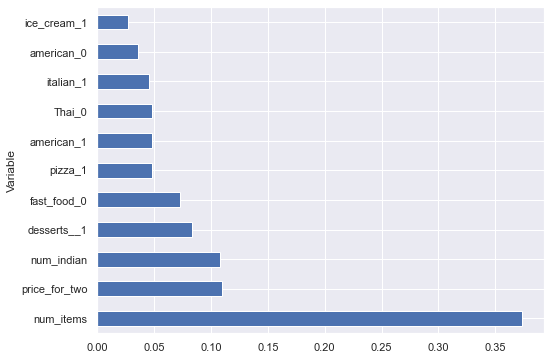

In [21]:
feat_importances = pd.Series(dt.feature_importances_, index = final_fi.Variable)

feat_importances.nlargest(11).plot(kind='barh')

In [22]:
#Accuracy on train

print("Training Accuracy is: ", dt.score(X_train, y_train))

#Accuracy on test

print("Testing Accuracy is: ", dt.score(X_test, y_test))

Training Accuracy is:  0.627906976744186
Testing Accuracy is:  0.625


In [23]:
# Confusion matrix
def plot_confusion_matrix(cm, classes=None, title= 'Confusion matrix'):
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes,yticklabels=classes, vmin=0.,vmax=1., annot=True,annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0, vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

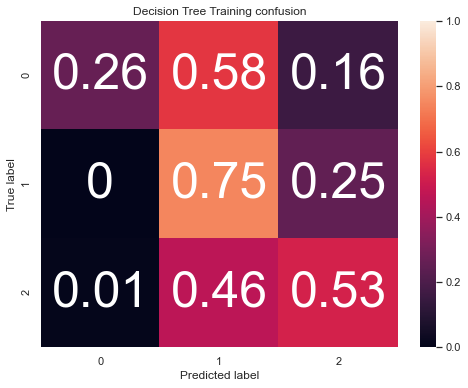

In [24]:
y_pred = dt.predict(X_train)

#plotting the matrix

cm = confusion_matrix(y_train,y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=dt.classes_, title='Decision Tree Training confusion')


In [25]:
# Calculating FP, FN, TP, TN

FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)


# SENSITIVITY, TPR

TPR= TP/(TP+FN)

print("TPR:", TPR)
# PRECISION, PPR (Positive Precision Rate)

PPV = TP/(TP+FP)
print("PPV:", PPV)

# FALSE ALARM RATE or FPR
FPR = FP/(FP+TN)
print("FPR:", FPR)

# FNR or MISS RATE

FNR = FN/(TP+FN)
print("FNR:", FNR)

# CLASSIFICATION ERROR
CER = (FP+FN)/(TP+FP+TN+FN)
print("CER:", CER)

#OVERALL ACCURACY

ACC = (TP+TN)/(TP+FP+FN+TN)

print("ACC:", ACC)

TPR: [0.26315789 0.74885845 0.52604167]
PPV: [0.71428571 0.62121212 0.63522013]
FPR: [0.00486618 0.47393365 0.24369748]
FNR: [0.73684211 0.25114155 0.47395833]
CER: [0.0372093  0.36046512 0.34651163]
ACC: [0.9627907  0.63953488 0.65348837]


In [26]:
# n_estimators - number of trees you want to build before taking the maximum voting or averages of predictions. 
# Higher number of trees give you better performance but makes your code slower

rf = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf.fit(X_train, y_train)

prediction_test = rf.predict(X=X_test)

print("training accuracy:", rf.score(X_train,y_train))
print("Test accuracy:", rf.score(X_test, y_test))

training accuracy: 0.9372093023255814
Test accuracy: 0.6041666666666666


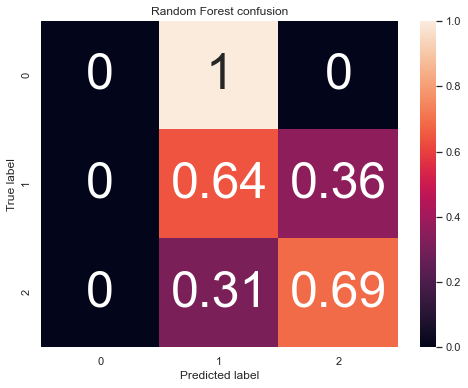

In [27]:
#plotting the matrix

cm = confusion_matrix(y_test,prediction_test)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=dt.classes_, title='Random Forest confusion')

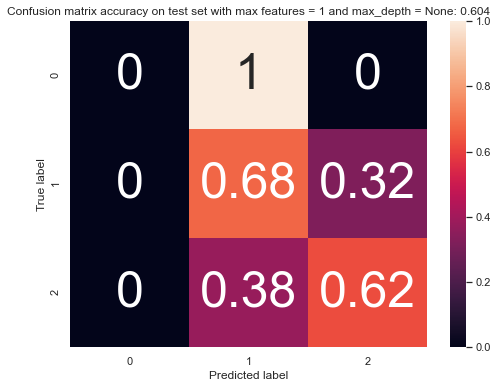

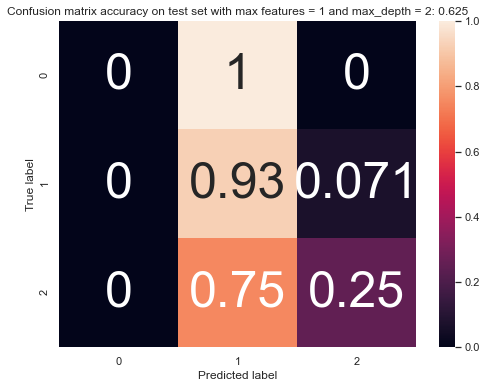

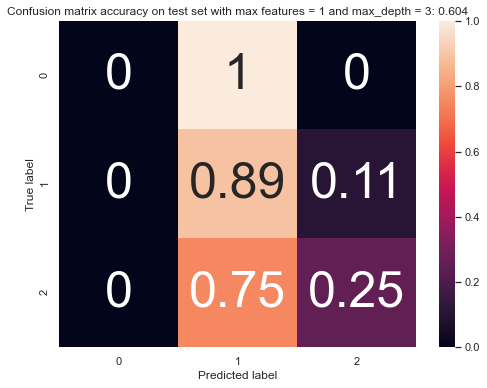

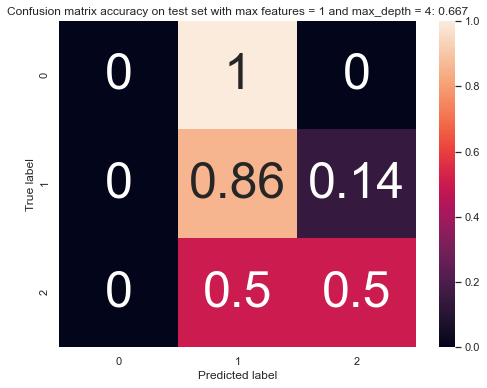

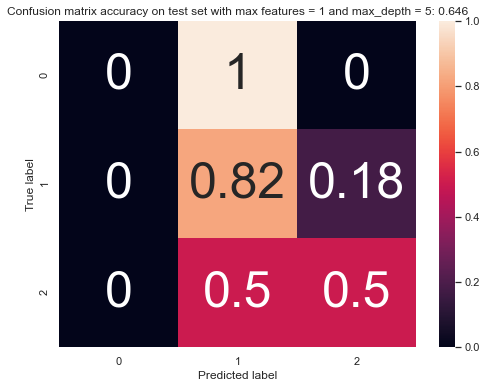

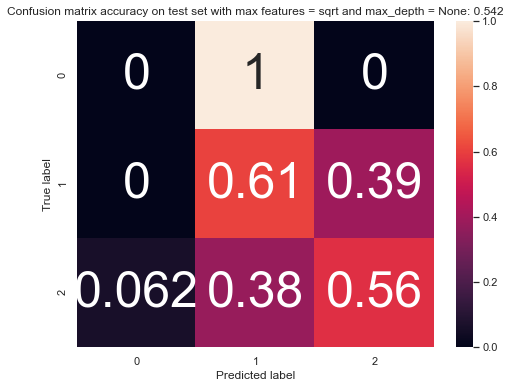

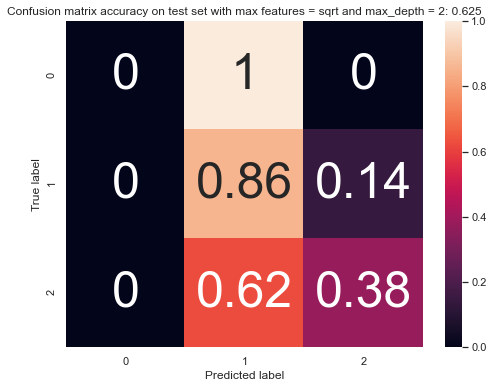

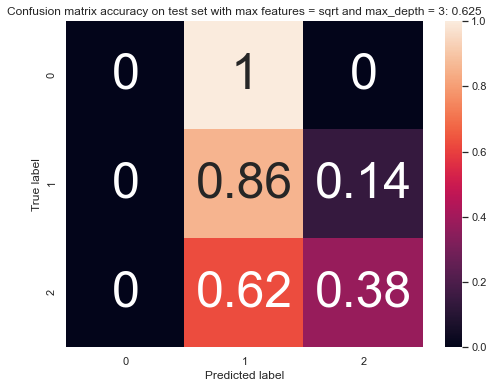

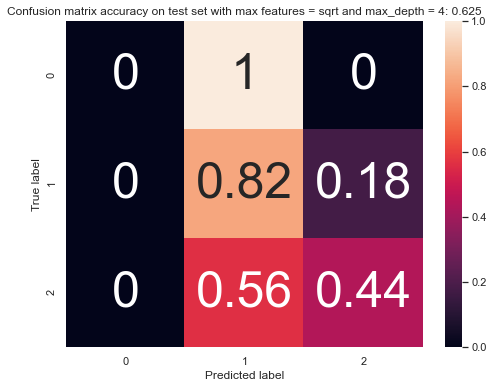

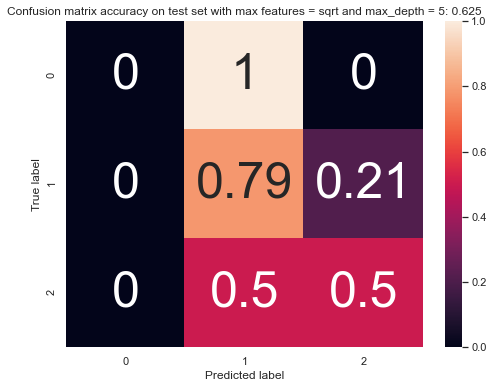

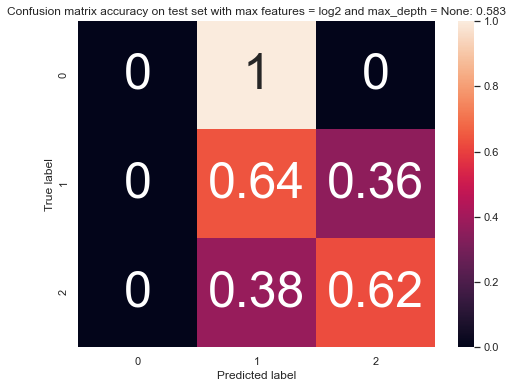

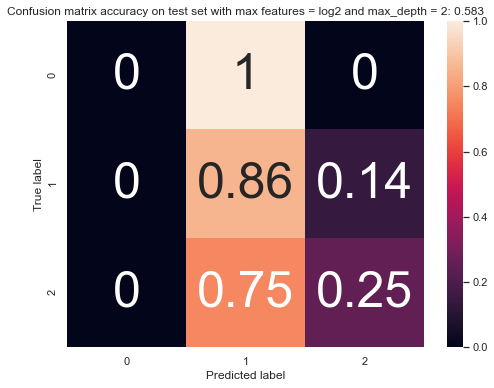

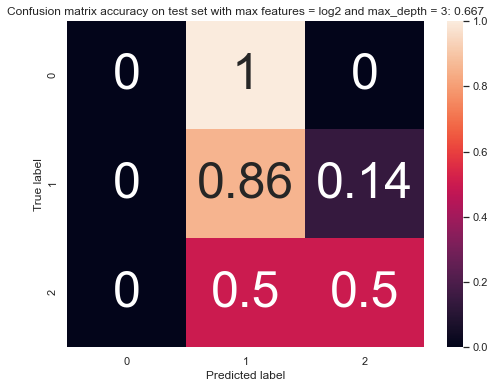

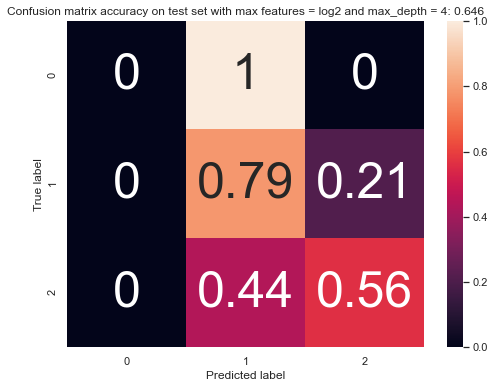

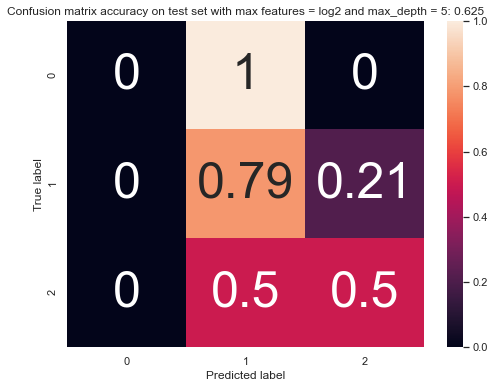

In [28]:
# tuning the hyperparameters

from itertools import product
n_estimators = 100
max_features = [1,'sqrt','log2']
max_depths = [None, 2, 3, 4, 5]

for f, d in product(max_features,max_depths):
    
    rf = RandomForestClassifier(n_estimators=n_estimators,
                               criterion='entropy',max_features=f,
                               max_depth=d,
                               n_jobs=2, random_state=1345)
    
    rf.fit(X_train,y_train)
    prediction_test = rf.predict(X=X_test)
    cm = confusion_matrix(y_test, prediction_test)
    cm_norm = cm/cm.sum(axis=1)[:,np.newaxis]
    plt.figure()
    plot_confusion_matrix(cm_norm, classes=rf.classes_,title='Confusion matrix accuracy on test set with max features = {} and max_depth = {}: {:.3f}'.format(f,d, accuracy_score(y_test,prediction_test)))    